# HIV Model

    Kyle McCracken 10/15/2018
   

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# import functions from the modsim.py module
from modsim import *

In [10]:
init = State(R=200, L=0, E=0, V=4e-7)

In [11]:
HIVsystem = System(gamma=1.36, 
                   tao=0.2, 
                   mu=0.00136, 
                   beta=0.00027, 
                   alpha=0.036, 
                   rho=0.1, 
                   pi=100, 
                   delta=0.33, 
                   sigma=2, 
                   t0=0, 
                   t_end=120,
                   init=init)

In [12]:
def slope_func(init, t, system):
    unpack(system)
    r, l, e, v = init
    
    drdt = gamma*tao - mu*r - beta*r*v
    dldt = rho*beta*r*v - mu*l - alpha*l
    dedt = (1 - rho)*beta*r*v + alpha*l - delta*e
    dvdt = pi*e - sigma*v
    
    return drdt, dldt, dedt, dvdt

In [13]:
slope_func(init, 0, HIVsystem)

(-2.1599999999999998e-08, 2.16e-09, 1.9439999999999997e-08, -8e-07)

In [14]:
results, details = run_ode_solver(HIVsystem, slope_func)

Text(0,0.5,'Infected CD4 Lymphocytes')

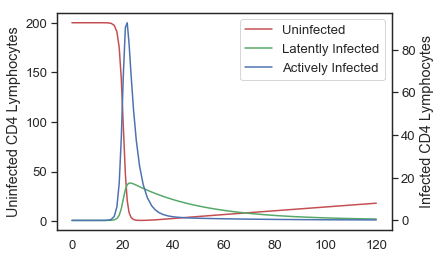

In [17]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

lns1 = ax1.plot(results.R,'r', label = 'Uninfected')

ax2 = ax1.twinx()
ax2.set_yscale('linear')

lns2 = ax2.plot(results.L,'g', label = 'Latently Infected')
lns3 = ax2.plot(results.E,'b', label = 'Actively Infected')

lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='best')

ax1.set_ylabel('Uninfected CD4 Lymphocytes')
ax2.set_ylabel('Infected CD4 Lymphocytes')